# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.0'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

2

: 

['Gambia', 'Dominica', 'Bahamas', 'Belize']

,
 

3

: 

[

'Seychelles'

, 

'Zimbabwe'

, 

'Tanzania'

, 

'Malta'

, 

'Mauritius'

, 

'Guyana'

,
     

'Papua New Guinea'

, 

'Fiji'

, 

'Namibia'

, 

'Brunei'

, 

'Antigua and Barbuda'

]

,
 

4

: 

[

'South Sudan'

, 

'Lebanon'

, 

'Eritrea'

, 

'Lesotho'

, 

'New Zealand'

, 

'Guatemala'

,
     

'Norway'

, 

'Angola'

, 

'Sao Tome and Principe'

, 

'Iceland'

, 

'Morocco'

,
     

'Montenegro'

, 

'Palestine'

, 

'Kyrgyzstan'

, 

'Vietnam'

, 

'Yemen'

, 

'Ireland'

,
     

'Venezuela'

, 

'Ethiopia'

, 

'Grenada'

, 

'Saint Lucia'

]

,
 

5

: 

[

'Equatorial Guinea'

, 

'Syria'

, 

'Japan'

, 

'Botswana'

, 

'Cambodia'

, 

'Zambia'

,
     

'Australia'

, 

'Kazakhstan'

, 

'Israel'

, 

'Liechtenstein'

,
     

'Central African Republic'

, 

'Mongolia'

, 

'Thailand'

, 

'Chad'

, 

'Malawi'

,
     

'Philippines'

, 

'Paraguay'

, 

'Madagascar'

, 

'Libya'

,
     

'Saint Vincent and the Grenadines'

]

,
 

6

: 

[

'Tajikistan'

, 

'Benin'

, 

'Uzbekistan'

, 

'Comoros'

, 

'Cyprus'

, 

'Sri Lanka'

,
     

'Greece'

, 

'Taiwan'

, 

'Luxembourg'

, 

'Slovakia'

, 

'Swaziland'

, 

'Barbados'

,
     

'Bermuda'

, 

'Mozambique'

, 

'Rwanda'

, 

'Afghanistan'

, 

'Netherlands'

, 

'Kosovo'

,
     

'San Marino'

, 

'Guinea-Bissau'

, 

'Spain'

, 

'Costa Rica'

, 

'Croatia'

,
     

'Slovenia'

, 

'Andorra'

, 

'Oman'

, 

'Cuba'

, 

'Maldives'

, 

'India'

, 

'Kenya'

,
     

'Qatar'

, 

'Suriname'

, 

'Somalia'

, 

'Congo'

, 

'Argentina'

]

,
 

7

: 

[

'Ghana'

, 

'Djibouti'

, 

'Niger'

, 

'Togo'

, 

'Azerbaijan'

, 

'Panama'

,
     

'Bosnia and Herzegovina'

, 

'Serbia'

, 

'Latvia'

, 

'Nepal'

, 

'Iraq'

, 

'Burundi'

,
     

'Macedonia'

, 

'Uganda'

, 

'China'

, 

'Jordan'

, 

'Gabon'

, 

'Canada'

, 

'Haiti'

,
     

'South Africa'

, 

'Germany'

, 

'Bhutan'

, 

'Jamaica'

, 

'Cameroon'

, 

'Sudan'

,
     

'Mauritania'

, 

'El Salvador'

, 

'Sierra Leone'

, 

'Ecuador'

, 

'Finland'

,
     

'Albania'

, 

'Nicaragua'

, 

'Colombia'

, 

'Tunisia'

]

,
 

8

: 

[

'Armenia'

, 

'Saudi Arabia'

, 

'Pakistan'

, 

'Uruguay'

, 

'Denmark'

, 

'Lithuania'

,
     

'Nigeria'

, 

'Belgium'

, 

'Burkina Faso'

, 

'Ukraine'

, 

'Belarus'

, 

'Monaco'

,
     

'Algeria'

, 

'Hungary'

, 

'Indonesia'

, 

'Cape Verde'

, 

'Georgia'

, 

'Chile'

,
     

'Egypt'

, 

'Korea, South'

, 

'Bulgaria'

, 

'Honduras'

, 

'Estonia'

,
     

'Dominican Republic'

, 

'Malaysia'

, 

'Romania'

, 

'Switzerland'

, 

'Liberia'

,
     

'Bangladesh'

, 

'Brazil'

, 

'Mali'

, 

'Bolivia'

, 

'Peru'

, 

'Singapore'

, 

'Austria'

,
     

'Czech Republic'

]

,
 

9

: 

[

'Myanmar'

, 

'United States'

, 

'Portugal'

, 

'Turkey'

, 

'Russia'

, 

'Poland'

,
     

'Italy'

, 

'Mexico'

, 

'Kuwait'

, 

'Moldova'

, 

'France'

]

,
 

10

: 

['Iran', 'Guinea', 'Bahrain', 'Senegal', 'United Arab Emirates']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=9)
# The number of countries
len(analyser.countries)

16

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

9

: 

[

'Myanmar'

, 

'United States'

, 

'Portugal'

, 

'Turkey'

, 

'Russia'

, 

'Poland'

,
     

'Italy'

, 

'Mexico'

, 

'Kuwait'

, 

'Moldova'

, 

'France'

]

,
 

10

: 

['Iran', 'Guinea', 'Bahrain', 'Senegal', 'United Arab Emirates']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country              Phase                                        
Iran                 1st    Past  29Mar2020  16Apr2020    81800269
                     2nd    Past  17Apr2020  10May2020    81800269
                     3rd    Past  11May2020  30May2020    81800269
                     4th    Past  31May2020  12Jun2020    81800269
                     5th    Past  13Jun2020  25Jun2020    81800269
                     6th    Past  26Jun2020  06Jul2020    81800269
                     7th    Past  07Jul2020  19Jul2020    81800269
                     8th    Past  20Jul2020  31Jul2020    81800269
                     9th    Past  01Aug2020  13Aug2020    81800269
                     10th   Past  14Aug2020  30Aug2020    81800269
Guinea               1st    Past  02May2020  11May2020    12414318
                     2nd    Past  12May2020  22May2020    12414318
                     3rd    Past  23May2020  30May2020    12414318
                     4th    Past  31May2020  14Jun2020    12414318
                     5th    Past  15Jun2020  01Jul2020    12414318
                     6th    Past  02Jul2020  13Jul2020    12414318
                     7th    Past  14Jul2020  23Jul2020    12414318
                     8th    Past  24Jul2020  05Aug2020    12414318
                     9th    Past  06Aug2020  15Aug2020    12414318
                     10th   Past  16Aug2020  30Aug2020    12414318
Bahrain              1st    Past  06May2020  30May2020     1569439
                     2nd    Past  31May2020  11Jun2020     1569439
                     3rd    Past  12Jun2020  20Jun2020     1569439
                     4th    Past  21Jun2020  28Jun2020     1569439
                     5th    Past  29Jun2020  07Jul2020     1569439
                     6th    Past  08Jul2020  15Jul2020     1569439
                     7th    Past  16Jul2020  25Jul2020     1569439
                     8th    Past  26Jul2020  05Aug2020     1569439
                     9th    Past  06Aug2020  17Aug2020     1569439
                     10th   Past  18Aug2020  30Aug2020     1569439
Senegal              1st    Past  03May2020  14May2020    15854360
                     2nd    Past  15May2020  28May2020    15854360
                     3rd    Past  29May2020  09Jun2020    15854360
                     4th    Past  10Jun2020  19Jun2020    15854360
                     5th    Past  20Jun2020  01Jul2020    15854360
                     6th    Past  02Jul2020  12Jul2020    15854360
                     7th    Past  13Jul2020  23Jul2020    15854360
                     8th    Past  24Jul2020  04Aug2020    15854360
                     9th    Past  05Aug2020  14Aug2020    15854360
                     10th   Past  15Aug2020  30Aug2020    15854360
United Arab Emirates 1st    Past  27Apr2020  12May2020     9630959
                     2nd    Past  13May2020  25May2020     9630959
                     3rd    Past  26May2020  03Jun2020     9630959
                     4th    Past  04Jun2020  11Jun2020     9630959
                     5th    Past  12Jun2020  22Jun2020     9630959
                     6th    Past  23Jun2020  02Jul2020     9630959
                     7th    Past  03Jul2020  10Jul2020     9630959
                     8th    Past  11Jul2020  25Jul2020     9630959
                     9th    Past  26Jul2020  13Aug2020     9630959
                     10th   Past  14Aug2020  30Aug2020     9630959

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	MDA,  6th phase (21Jul2020 - 29Jul2020): finished  259 trials in 0 min  5 sec

	FRA,  8th phase (21Jul2020 - 10Aug2020): finished  436 trials in 0 min 10 sec

	SEN,  5th phase (20Jun2020 - 01Jul2020): finished  824 trials in 0 min 20 sec

	MEX,  1st phase (21May2020 - 07Jun2020): finished 1132 trials in 0 min 30 sec

	GIN,  5th phase (15Jun2020 - 01Jul2020): finished 1889 trials in 1 min  0 sec

	ARE,  9th phase (26Jul2020 - 13Aug2020): finished 1077 trials in 0 min 30 sec

	MEX,  6th phase (19Jul2020 - 28Jul2020): finished  430 trials in 0 min 10 sec

	FRA,  4th phase (25Apr2020 - 04May2020): finished 1898 trials in 1 min  0 sec

	TUR,  7th phase (14Jul2020 - 30Jul2020): finished  245 trials in 0 min  5 sec

	MMR,  4th phase (06Jun2020 - 15Jun2020): finished 1900 trials in 1 min  0 sec

	ARE,  8th phase (11Jul2020 - 25Jul2020): finished  243 trials in 0 min  5 sec

	FRA,  7th phase (24Jun2020 - 20Jul2020): finished  807 trials in 0 min 20 sec

	MEX,  9th phase (20Aug2020 - 30Aug2020): finished 1881 trials in 1 min  0 sec

	PRT,  2nd phase (18May2020 - 30May2020): finished 1857 trials in 1 min  0 sec

	BHR,  9th phase (06Aug2020 - 17Aug2020): finished  229 trials in 0 min  5 sec

	GIN,  6th phase (02Jul2020 - 13Jul2020): finished 1838 trials in 1 min  0 sec

	MMR,  7th phase (10Jul2020 - 29Jul2020): finished 1824 trials in 1 min  0 sec

	ARE,  4th phase (04Jun2020 - 11Jun2020): finished 1072 trials in 0 min 30 sec

	ARE,  2nd phase (13May2020 - 25May2020): finished 1845 trials in 1 min  0 sec

	ARE,  1st phase (27Apr2020 - 12May2020): finished 1847 trials in 1 min  0 sec

	FRA,  6th phase (27May2020 - 23Jun2020): finished 1837 trials in 1 min  0 sec

	BHR,  3rd phase (12Jun2020 - 20Jun2020): finished  233 trials in 0 min  5 sec

	GIN,  9th phase (06Aug2020 - 15Aug2020): finished  231 trials in 0 min  5 sec

	TUR,  4th phase (29May2020 - 15Jun2020): finished  224 trials in 0 min  5 sec

	IRN,  8th phase (20Jul2020 - 31Jul2020): finished  224 trials in 0 min  5 sec

	POL,  1st phase (24Apr2020 - 12May2020): finished 1826 trials in 1 min  0 sec

	FRA,  5th phase (05May2020 - 26May2020): finished 1825 trials in 1 min  0 sec

	POL,  4th phase (12Jun2020 - 30Jun2020): finished 1825 trials in 1 min  0 sec

	KWT,  3rd phase (11Jun2020 - 23Jun2020): finished  625 trials in 0 min 15 sec

	IRN,  1st phase (29Mar2020 - 16Apr2020): finished 1819 trials in 1 min  0 sec

	ARE,  5th phase (12Jun2020 - 22Jun2020): finished 1081 trials in 0 min 30 sec

	TUR,  5th phase (16Jun2020 - 28Jun2020): finished  226 trials in 0 min  5 sec

	FRA,  3rd phase (12Apr2020 - 24Apr2020): finished 1852 trials in 1 min  0 sec

	RUS,  1st phase (08May2020 - 22May2020): finished 1855 trials in 1 min  0 sec

	KWT,  4th phase (24Jun2020 - 04Jul2020): finished 1843 trials in 1 min  0 sec

	KWT,  2nd phase (25May2020 - 10Jun2020): finished 1816 trials in 1 min  0 sec

	MEX,  7th phase (29Jul2020 - 11Aug2020): finished 1803 trials in 1 min  0 sec

	KWT,  7th phase (26Jul2020 - 06Aug2020): finished  580 trials in 0 min 15 sec

	MEX,  8th phase (12Aug2020 - 19Aug2020): finished 1817 trials in 1 min  0 sec

	TUR,  2nd phase (30Apr2020 - 14May2020): finished 1049 trials in 0 min 30 sec

	SEN,  8th phase (24Jul2020 - 04Aug2020): finished  623 trials in 0 min 15 sec

	PRT,  7th phase (15Jul2020 - 27Jul2020): finished  188 trials in 0 min  5 sec

	TUR,  9th phase (15Aug2020 - 30Aug2020): finished  592 trials in 0 min 15 sec

	SEN,  1st phase (03May2020 - 14May2020): finished  541 trials in 0 min 15 sec

	ITA,  5th phase (01May2020 - 09May2020): finished  602 trials in 0 min 15 sec

	MMR,  8th phase (30Jul2020 - 16Aug2020): finished 1760 trials in 1 min  0 sec

	TUR,  1st phase (18Apr2020 - 29Apr2020): finished 1747 trials in 1 min  0 sec

	IRN,  7th phase (07Jul2020 - 19Jul2020): finished  220 trials in 0 min  5 sec

	RUS,  5th phase (01Jul2020 - 10Jul2020): finished 1762 trials in 1 min  0 sec

	MDA,  3rd phase (15Jun2020 - 24Jun2020): finished  767 trials in 0 min 20 sec

	MEX,  2nd phase (08Jun2020 - 19Jun2020): finished  922 trials in 0 min 25 sec

	RUS,  8th phase (01Aug2020 - 14Aug2020): finished 1795 trials in 1 min  0 sec

	USA,  9th phase (18Aug2020 - 30Aug2020): finished  205 trials in 0 min  5 sec

	ITA,  4th phase (21Apr2020 - 30Apr2020): finished  213 trials in 0 min  5 sec

	GIN,  7th phase (14Jul2020 - 23Jul2020): finished 1810 trials in 1 min  0 sec

	IRN, 10th phase (14Aug2020 - 30Aug2020): finished  202 trials in 0 min  5 sec

	FRA,  2nd phase (03Apr2020 - 11Apr2020): finished 1796 trials in 1 min  0 sec

	USA,  1st phase (21Apr2020 - 12May2020): finished 1783 trials in 1 min  0 sec

	SEN,  7th phase (13Jul2020 - 23Jul2020): finished  417 trials in 0 min 10 sec

	IRN,  6th phase (26Jun2020 - 06Jul2020): finished  219 trials in 0 min  5 sec

	BHR,  5th phase (29Jun2020 - 07Jul2020): finished 1803 trials in 1 min  0 sec

	MMR,  5th phase (16Jun2020 - 01Jul2020): finished 1807 trials in 1 min  0 sec

	BHR,  8th phase (26Jul2020 - 05Aug2020): finished  220 trials in 0 min  5 sec

	IRN,  3rd phase (11May2020 - 30May2020): finished 1798 trials in 1 min  0 sec

	PRT,  3rd phase (31May2020 - 12Jun2020): finished  895 trials in 0 min 25 sec

	ARE,  7th phase (03Jul2020 - 10Jul2020): finished 1782 trials in 1 min  0 sec

	MMR,  3rd phase (26May2020 - 05Jun2020): finished 1771 trials in 1 min  0 sec

	PRT,  5th phase (25Jun2020 - 05Jul2020): finished  415 trials in 0 min 10 sec

	GIN,  8th phase (24Jul2020 - 05Aug2020): finished  405 trials in 0 min 10 sec

	MDA,  7th phase (30Jul2020 - 08Aug2020): finished 1026 trials in 0 min 30 sec

	USA,  7th phase (24Jul2020 - 08Aug2020): finished  218 trials in 0 min  5 sec

	KWT,  5th phase (05Jul2020 - 15Jul2020): finished 1774 trials in 1 min  0 sec

	ARE,  6th phase (23Jun2020 - 02Jul2020): finished  575 trials in 0 min 15 sec

	IRN,  9th phase (01Aug2020 - 13Aug2020): finished  210 trials in 0 min  5 sec

	PRT,  4th phase (13Jun2020 - 24Jun2020): finished  401 trials in 0 min 10 sec

	BHR,  1st phase (06May2020 - 30May2020): finished 1759 trials in 1 min  0 sec

	BHR,  2nd phase (31May2020 - 11Jun2020): finished 1772 trials in 1 min  0 sec

	MEX,  3rd phase (20Jun2020 - 30Jun2020): finished 1784 trials in 1 min  0 sec

	KWT,  8th phase (07Aug2020 - 17Aug2020): finished  217 trials in 0 min  5 sec

	SEN,  9th phase (05Aug2020 - 14Aug2020): finished  590 trials in 0 min 15 sec

	ITA,  3rd phase (12Apr2020 - 20Apr2020): finished  206 trials in 0 min  5 sec

	MDA,  4th phase (25Jun2020 - 08Jul2020): finished 1722 trials in 1 min  0 sec

	GIN,  4th phase (31May2020 - 14Jun2020): finished 1723 trials in 1 min  0 sec

	POL,  2nd phase (13May2020 - 28May2020): finished  562 trials in 0 min 15 sec

	GIN,  1st phase (02May2020 - 11May2020): finished 1726 trials in 1 min  0 sec

	MEX,  5th phase (11Jul2020 - 18Jul2020): finished  205 trials in 0 min  5 sec

	MDA,  1st phase (11May2020 - 01Jun2020): finished 1704 trials in 1 min  0 sec

	ARE,  3rd phase (26May2020 - 03Jun2020): finished 1030 trials in 0 min 40 sec

	MDA,  2nd phase (02Jun2020 - 14Jun2020): finished 1494 trials in 1 min  0 sec

	GIN, 10th phase (16Aug2020 - 30Aug2020): finished 1414 trials in 1 min  0 sec

	USA,  2nd phase (13May2020 - 04Jun2020): finished 1257 trials in 1 min  0 sec

	POL,  5th phase (01Jul2020 - 14Jul2020): finished  144 trials in 0 min  5 sec

	IRN,  2nd phase (17Apr2020 - 10May2020): finished  160 trials in 0 min  5 sec

	USA,  3rd phase (05Jun2020 - 23Jun2020): finished  274 trials in 0 min 10 sec

	ITA,  8th phase (14Jun2020 - 03Aug2020): finished  919 trials in 0 min 40 sec

	RUS,  2nd phase (23May2020 - 05Jun2020): finished 1332 trials in 1 min  0 sec

	IRN,  5th phase (13Jun2020 - 25Jun2020): finished  243 trials in 0 min 10 sec

	KWT,  1st phase (12May2020 - 24May2020): finished 1301 trials in 1 min  0 sec

	MDA,  5th phase (09Jul2020 - 20Jul2020): finished  395 trials in 0 min 15 sec

	USA,  6th phase (16Jul2020 - 23Jul2020): finished  183 trials in 0 min  5 sec

	MMR,  1st phase (29Apr2020 - 17May2020): finished 1340 trials in 1 min  0 sec

	SEN,  6th phase (02Jul2020 - 12Jul2020): finished 1392 trials in 1 min  0 sec

	SEN,  3rd phase (29May2020 - 09Jun2020): finished 1308 trials in 1 min  0 sec

	GIN,  2nd phase (12May2020 - 22May2020): finished 1329 trials in 1 min  0 sec

	USA,  8th phase (09Aug2020 - 17Aug2020): finished  633 trials in 0 min 25 sec

	PRT,  6th phase (06Jul2020 - 14Jul2020): finished  255 trials in 0 min 10 sec

	TUR,  8th phase (31Jul2020 - 14Aug2020): finished  229 trials in 0 min 10 sec

	POL,  7th phase (28Jul2020 - 05Aug2020): finished  218 trials in 0 min 10 sec

	BHR,  7th phase (16Jul2020 - 25Jul2020): finished  123 trials in 0 min  5 sec

	ITA,  7th phase (22May2020 - 13Jun2020): finished  466 trials in 0 min 20 sec

	BHR,  6th phase (08Jul2020 - 15Jul2020): finished 1195 trials in 1 min  0 sec

	SEN,  4th phase (10Jun2020 - 19Jun2020): finished 1232 trials in 1 min  0 sec

	POL,  3rd phase (29May2020 - 11Jun2020): finished  260 trials in 0 min 10 sec

	FRA,  9th phase (11Aug2020 - 30Aug2020): finished  465 trials in 0 min 20 sec

	RUS,  7th phase (21Jul2020 - 31Jul2020): finished 1227 trials in 1 min  0 sec

	ITA,  9th phase (04Aug2020 - 30Aug2020): finished 1190 trials in 1 min  0 sec

	MMR,  9th phase (17Aug2020 - 30Aug2020): finished 1203 trials in 1 min  0 sec

	MMR,  6th phase (02Jul2020 - 09Jul2020): finished  142 trials in 0 min  5 sec

	RUS,  3rd phase (06Jun2020 - 20Jun2020): finished 1219 trials in 1 min  0 sec

	TUR,  6th phase (29Jun2020 - 13Jul2020): finished  380 trials in 0 min 15 sec

	RUS,  6th phase (11Jul2020 - 20Jul2020): finished 1234 trials in 1 min  0 sec

	TUR,  3rd phase (15May2020 - 28May2020): finished  252 trials in 0 min 10 sec

	FRA,  1st phase (25Mar2020 - 02Apr2020): finished 1208 trials in 1 min  0 sec

	ITA,  6th phase (10May2020 - 21May2020): finished  346 trials in 0 min 10 sec

	BHR,  4th phase (21Jun2020 - 28Jun2020): finished 1382 trials in 1 min  0 sec

	ITA,  1st phase (23Mar2020 - 31Mar2020): finished 1680 trials in 1 min  0 sec

	GIN,  3rd phase (23May2020 - 30May2020): finished 1718 trials in 1 min  0 sec

	PRT,  1st phase (04May2020 - 17May2020): finished 1884 trials in 1 min  0 sec

	USA,  5th phase (07Jul2020 - 15Jul2020): finished  236 trials in 0 min  5 sec

	RUS,  4th phase (21Jun2020 - 30Jun2020): finished 1942 trials in 1 min  0 sec

	ITA,  2nd phase (01Apr2020 - 11Apr2020): finished 1069 trials in 0 min 25 sec

	USA,  4th phase (24Jun2020 - 06Jul2020): finished 2092 trials in 1 min  0 sec

	PRT,  8th phase (28Jul2020 - 12Aug2020): finished  693 trials in 0 min 15 sec

	MMR,  2nd phase (18May2020 - 25May2020): finished  270 trials in 0 min  5 sec

	PRT,  9th phase (13Aug2020 - 30Aug2020): finished 2143 trials in 1 min  0 sec

Completed optimization. Total: 23 min 20 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE  \
Country              Phase                                                  
Iran                 1st    Past  29Mar2020  16Apr2020    81800269  SIR-F   
                     2nd    Past  17Apr2020  10May2020    81800269  SIR-F   
                     3rd    Past  11May2020  30May2020    81800269  SIR-F   
                     4th    Past  31May2020  12Jun2020    81800269      -   
                     5th    Past  13Jun2020  25Jun2020    81800269  SIR-F   
                     6th    Past  26Jun2020  06Jul2020    81800269  SIR-F   
                     7th    Past  07Jul2020  19Jul2020    81800269  SIR-F   
                     8th    Past  20Jul2020  31Jul2020    81800269  SIR-F   
                     9th    Past  01Aug2020  13Aug2020    81800269  SIR-F   
                     10th   Past  14Aug2020  30Aug2020    81800269  SIR-F   
Guinea               1st    Past  02May2020  11May2020    12414318  SIR-F   
                     2nd    Past  12May2020  22May2020    12414318  SIR-F   
                     3rd    Past  23May2020  30May2020    12414318  SIR-F   
                     4th    Past  31May2020  14Jun2020    12414318  SIR-F   
                     5th    Past  15Jun2020  01Jul2020    12414318  SIR-F   
                     6th    Past  02Jul2020  13Jul2020    12414318  SIR-F   
                     7th    Past  14Jul2020  23Jul2020    12414318  SIR-F   
                     8th    Past  24Jul2020  05Aug2020    12414318  SIR-F   
                     9th    Past  06Aug2020  15Aug2020    12414318  SIR-F   
                     10th   Past  16Aug2020  30Aug2020    12414318  SIR-F   
Bahrain              1st    Past  06May2020  30May2020     1569439  SIR-F   
                     2nd    Past  31May2020  11Jun2020     1569439  SIR-F   
                     3rd    Past  12Jun2020  20Jun2020     1569439  SIR-F   
                     4th    Past  21Jun2020  28Jun2020     1569439  SIR-F   
                     5th    Past  29Jun2020  07Jul2020     1569439  SIR-F   
                     6th    Past  08Jul2020  15Jul2020     1569439  SIR-F   
                     7th    Past  16Jul2020  25Jul2020     1569439  SIR-F   
                     8th    Past  26Jul2020  05Aug2020     1569439  SIR-F   
                     9th    Past  06Aug2020  17Aug2020     1569439  SIR-F   
                     10th   Past  18Aug2020  30Aug2020     1569439      -   
Senegal              1st    Past  03May2020  14May2020    15854360  SIR-F   
                     2nd    Past  15May2020  28May2020    15854360      -   
                     3rd    Past  29May2020  09Jun2020    15854360  SIR-F   
                     4th    Past  10Jun2020  19Jun2020    15854360  SIR-F   
                     5th    Past  20Jun2020  01Jul2020    15854360  SIR-F   
                     6th    Past  02Jul2020  12Jul2020    15854360  SIR-F   
                     7th    Past  13Jul2020  23Jul2020    15854360  SIR-F   
                     8th    Past  24Jul2020  04Aug2020    15854360  SIR-F   
                     9th    Past  05Aug2020  14Aug2020    15854360  SIR-F   
                     10th   Past  15Aug2020  30Aug2020    15854360      -   
United Arab Emirates 1st    Past  27Apr2020  12May2020     9630959  SIR-F   
                     2nd    Past  13May2020  25May2020     9630959  SIR-F   
                     3rd    Past  26May2020  03Jun2020     9630959  SIR-F   
                     4th    Past  04Jun2020  11Jun2020     9630959  SIR-F   
                     5th    Past  12Jun2020  22Jun2020     9630959  SIR-F   
                     6th    Past  23Jun2020  02Jul2020     9630959  SIR-F   
                     7th    Past  03Jul2020  10Jul2020     9630959  SIR-F   
                     8th    Past  11Jul2020  25Jul2020     9630959  SIR-F   
                     9th    Past  26Jul2020  13Aug2020     9630959  SIR-F   
                     10th   Past  14Aug2020  30Aug2020     9630959      -   

                       

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-04-29,Myanmar,0.15177,2.43026e-05,0.000298933,0.00990058,0.152,10286,836,25,...,2,4,2,2,2,3,2,2,1,86.11
1,2020-04-30,Myanmar,0.15177,2.43026e-05,0.000298933,0.00990058,0.152,10286,836,25,...,2,4,2,2,2,3,2,2,1,86.11
2,2020-05-01,Myanmar,0.15177,2.43026e-05,0.000298933,0.00990058,0.152,10286,836,25,...,2,4,2,2,2,3,2,2,1,86.11
3,2020-05-02,Myanmar,0.15177,2.43026e-05,0.000298933,0.00990058,0.152,10286,836,25,...,2,4,2,2,2,3,2,2,1,86.11
4,2020-05-03,Myanmar,0.15177,2.43026e-05,0.000298933,0.00990058,0.152,10286,836,25,...,2,4,2,2,2,3,2,2,1,84.26


### $Rt$: Reprodcution number $\mathrm{[-]}$

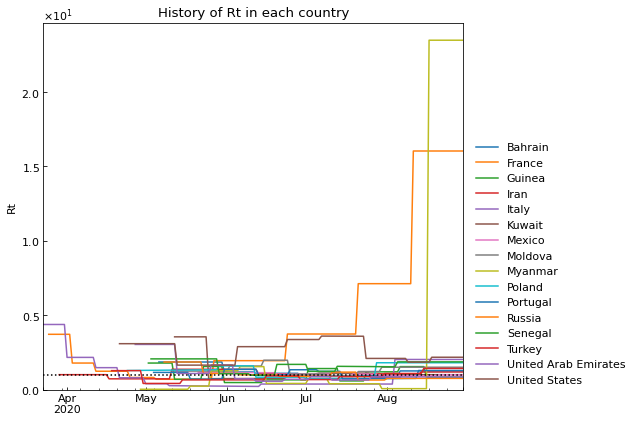

Country,Bahrain,France,Guinea,Iran,Italy,Kuwait,Mexico,Moldova,Myanmar,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,
2020-08-26,1.26,16.03,0.84,1.19,2.03,1.01,1.0,1.51,23.47,1.81,1.29,0.76,1.87,1.43,0.86,2.18
2020-08-27,1.26,16.03,0.84,1.19,2.03,1.01,1.0,1.51,23.47,1.81,1.29,0.76,1.87,1.43,0.86,2.18
2020-08-28,1.26,16.03,0.84,1.19,2.03,1.01,1.0,1.51,23.47,1.81,1.29,0.76,1.87,1.43,0.86,2.18
2020-08-29,1.26,16.03,0.84,1.19,2.03,1.01,1.0,1.51,23.47,1.81,1.29,0.76,1.87,1.43,0.86,2.18
2020-08-30,1.26,16.03,0.84,1.19,2.03,1.01,1.0,1.51,23.47,1.81,1.29,0.76,1.87,1.43,0.86,2.18


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

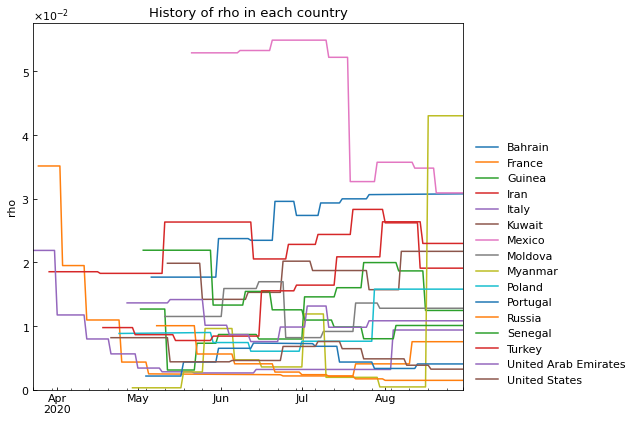

Country,Bahrain,France,Guinea,Iran,Italy,Kuwait,Mexico,Moldova,Myanmar,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,
2020-08-26,0.030746,0.007535,0.01244,0.019078,0.009369,0.021717,0.030887,0.012785,0.042998,0.015784,0.004042,0.001468,0.010079,0.022959,0.010818,0.003226
2020-08-27,0.030746,0.007535,0.01244,0.019078,0.009369,0.021717,0.030887,0.012785,0.042998,0.015784,0.004042,0.001468,0.010079,0.022959,0.010818,0.003226
2020-08-28,0.030746,0.007535,0.01244,0.019078,0.009369,0.021717,0.030887,0.012785,0.042998,0.015784,0.004042,0.001468,0.010079,0.022959,0.010818,0.003226
2020-08-29,0.030746,0.007535,0.01244,0.019078,0.009369,0.021717,0.030887,0.012785,0.042998,0.015784,0.004042,0.001468,0.010079,0.022959,0.010818,0.003226
2020-08-30,0.030746,0.007535,0.01244,0.019078,0.009369,0.021717,0.030887,0.012785,0.042998,0.015784,0.004042,0.001468,0.010079,0.022959,0.010818,0.003226


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

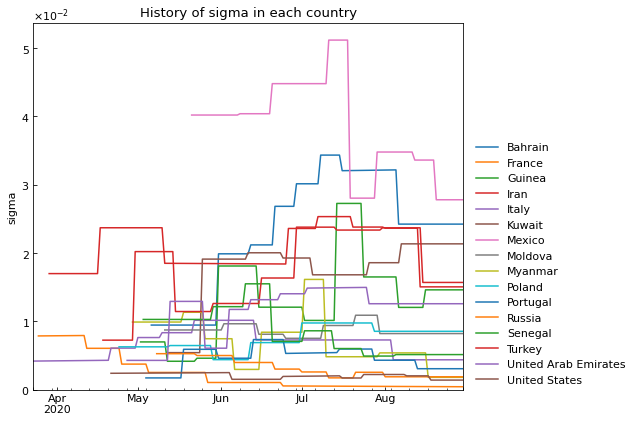

Country,Bahrain,France,Guinea,Iran,Italy,Kuwait,Mexico,Moldova,Myanmar,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,
2020-08-26,0.024231,0.000433,0.014613,0.015049,0.004377,0.021344,0.027796,0.008213,0.00181,0.008545,0.003071,0.001889,0.005139,0.015696,0.012581,0.001406
2020-08-27,0.024231,0.000433,0.014613,0.015049,0.004377,0.021344,0.027796,0.008213,0.00181,0.008545,0.003071,0.001889,0.005139,0.015696,0.012581,0.001406
2020-08-28,0.024231,0.000433,0.014613,0.015049,0.004377,0.021344,0.027796,0.008213,0.00181,0.008545,0.003071,0.001889,0.005139,0.015696,0.012581,0.001406
2020-08-29,0.024231,0.000433,0.014613,0.015049,0.004377,0.021344,0.027796,0.008213,0.00181,0.008545,0.003071,0.001889,0.005139,0.015696,0.012581,0.001406
2020-08-30,0.024231,0.000433,0.014613,0.015049,0.004377,0.021344,0.027796,0.008213,0.00181,0.008545,0.003071,0.001889,0.005139,0.015696,0.012581,0.001406


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

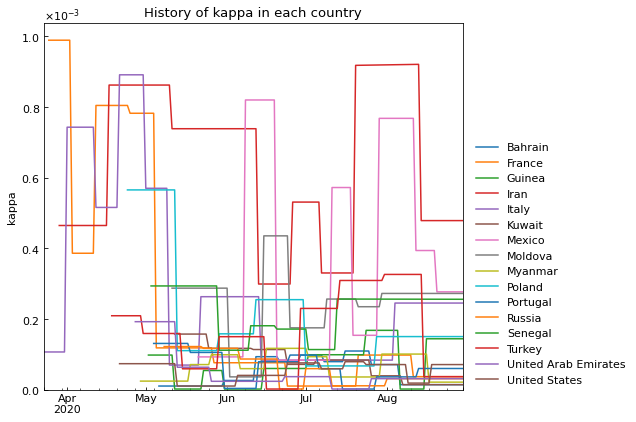

Country,Bahrain,France,Guinea,Iran,Italy,Kuwait,Mexico,Moldova,Myanmar,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,
2020-08-26,0.000014,0.000037,0.000144,0.000479,0.000245,0.000014,0.000277,0.000272,0.000021,0.00015,0.00006,0.000031,0.000256,0.000037,0.000031,0.000071
2020-08-27,0.000014,0.000037,0.000144,0.000479,0.000245,0.000014,0.000277,0.000272,0.000021,0.00015,0.00006,0.000031,0.000256,0.000037,0.000031,0.000071
2020-08-28,0.000014,0.000037,0.000144,0.000479,0.000245,0.000014,0.000277,0.000272,0.000021,0.00015,0.00006,0.000031,0.000256,0.000037,0.000031,0.000071
2020-08-29,0.000014,0.000037,0.000144,0.000479,0.000245,0.000014,0.000277,0.000272,0.000021,0.00015,0.00006,0.000031,0.000256,0.000037,0.000031,0.000071
2020-08-30,0.000014,0.000037,0.000144,0.000479,0.000245,0.000014,0.000277,0.000272,0.000021,0.00015,0.00006,0.000031,0.000256,0.000037,0.000031,0.000071


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

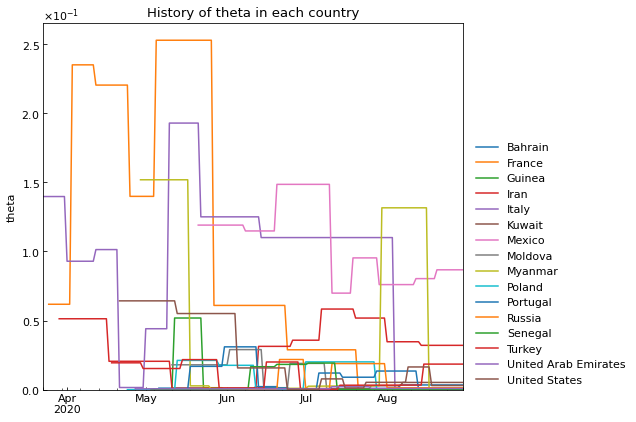

Country,Bahrain,France,Guinea,Iran,Italy,Kuwait,Mexico,Moldova,Myanmar,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,
2020-08-26,0.00344,0.000679,0.000086,0.032072,0.000143,0.00526,0.08668,0.000204,0.000686,0.000657,0.000055,0.001416,0.000409,0.018505,0.000938,0.003015
2020-08-27,0.00344,0.000679,0.000086,0.032072,0.000143,0.00526,0.08668,0.000204,0.000686,0.000657,0.000055,0.001416,0.000409,0.018505,0.000938,0.003015
2020-08-28,0.00344,0.000679,0.000086,0.032072,0.000143,0.00526,0.08668,0.000204,0.000686,0.000657,0.000055,0.001416,0.000409,0.018505,0.000938,0.003015
2020-08-29,0.00344,0.000679,0.000086,0.032072,0.000143,0.00526,0.08668,0.000204,0.000686,0.000657,0.000055,0.001416,0.000409,0.018505,0.000938,0.003015
2020-08-30,0.00344,0.000679,0.000086,0.032072,0.000143,0.00526,0.08668,0.000204,0.000686,0.000657,0.000055,0.001416,0.000409,0.018505,0.000938,0.003015


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26178 entries, 0 to 26387
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 26178 non-null  datetime64[ns]
 1   Country                              26178 non-null  object        
 2   Rt                                   26178 non-null  float64       
 3   theta                                26178 non-null  float64       
 4   kappa                                26178 non-null  float64       
 5   rho                                  26178 non-null  float64       
 6   sigma                                26178 non-null  float64       
 7   School_closing                       26178 non-null  int64         
 8   Workplace_closing                    26178 non-null  int64         
 9   Cancel_events                        26178 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.168891,-0.071265,0.194073,-0.264649,-0.375151,-0.112040,0.023130,0.173849,-0.197855,-0.103077,-0.067275,-0.218683,0.023076,-0.191250,-0.199338,-0.172183
theta,-0.168891,1.000000,0.358509,0.128292,0.211854,0.168672,0.319332,0.039842,-0.244016,-0.168283,-0.125968,-0.152857,0.001779,0.026373,-0.608194,-0.124818,0.231750
kappa,-0.071265,0.358509,1.000000,0.485822,0.352519,0.235031,0.280845,-0.028896,-0.144419,0.106962,0.031190,-0.030365,0.085772,-0.118008,-0.586311,-0.065971,0.384517
rho,0.194073,0.128292,0.485822,1.000000,0.629740,0.261876,0.178710,-0.109923,-0.103733,0.056203,0.113478,-0.017648,0.193329,-0.128710,-0.341244,-0.199328,0.268906
sigma,-0.264649,0.211854,0.352519,0.629740,1.000000,0.289839,-0.057007,-0.138643,-0.513682,-0.115123,-0.063504,-0.252727,0.121648,-0.171912,-0.319898,0.126747,0.049216
School_closing,-0.375151,0.168672,0.235031,0.261876,0.289839,1.000000,0.521046,0.056549,-0.153306,0.318159,0.195614,0.143569,0.577240,-0.037265,0.043622,-0.425630,0.550906
Workplace_closing,-0.112040,0.319332,0.280845,0.178710,-0.057007,0.521046,1.000000,0.139917,0.228568,0.533405,0.443652,0.443603,0.291863,0.003924,-0.085437,-0.482128,0.719733
Cancel_events,0.023130,0.039842,-0.028896,-0.109923,-0.138643,0.056549,0.139917,1.000000,0.195467,0.088991,0.188234,0.182093,0.012592,-0.005392,0.035219,-0.058574,0.200003
Gatherings_restrictions,0.173849,-0.244016,-0.144419,-0.103733,-0.513682,-0.153306,0.228568,0.195467,1.000000,0.559327,0.443279,0.620232,0.120038,0.090030,0.333648,-0.206264,0.411323
Transport_closing,-0.197855,-0.168283,0.106962,0.056203,-0.115123,0.318159,0.533405,0.088991,0.559327,1.000000,0.557567,0.796555,0.325743,-0.114377,0.294421,-0.256943,0.710617


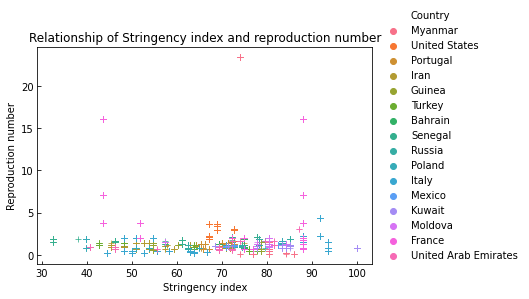

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()